# Data input

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # for graphics
import seaborn as sns # for graphics

In [2]:
# read the dataset
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Column definitions:

- Temperature - Temperature of the star, expressed in degrees of Kelvin: (K)
- L - Relative luminosity, expressed in terms of nominal solar luminosity: (L/L⊙)
- R - Relative radius, expressed in terms of nominal solar radius: (R/R⊙)
- A_M - Absolute magnitude, expressed in: (Mv)
- Color - Observable color of the star
- Spectral_Class - Spectral class of the star, classified under the Morgan–Keenan (MK) system
- Type - Type of the star:
    - Red Dwarf - 0
    - Brown Dwarf - 1
    - White Dwarf - 2
    - Main Sequence - 3
    - Super Giant - 4
    - Hyper Giant - 5



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Basic observations on numerical variables

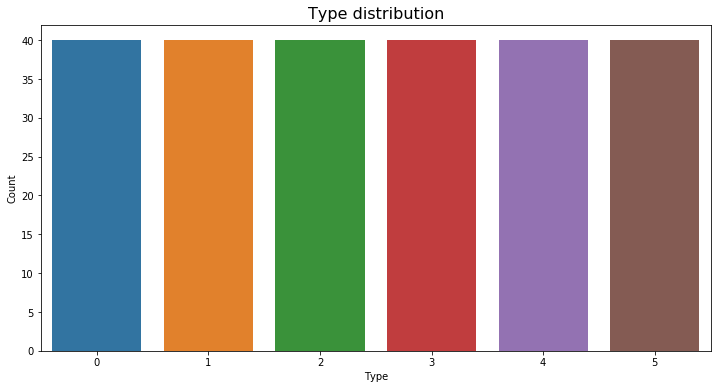

In [4]:
#Type distribution
plt.figure(figsize=(12, 6))
sns.countplot(x="Type", data=df)
plt.title("Type distribution", fontsize=16)
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks
plt.yticks
plt.show()

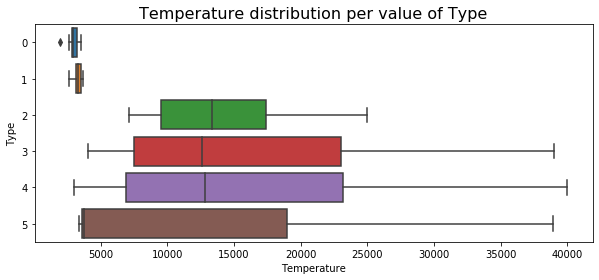

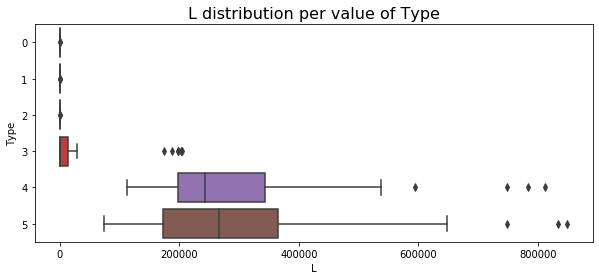

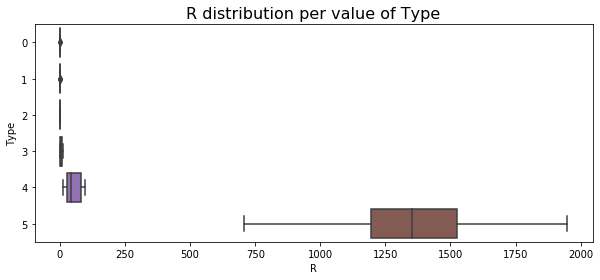

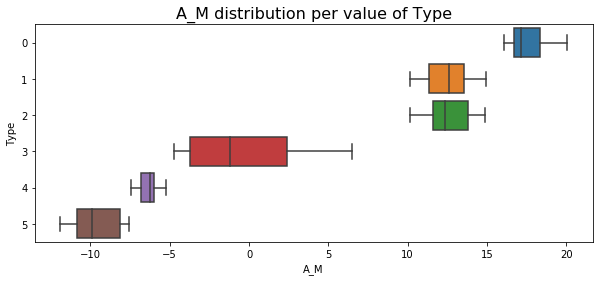

In [5]:
# Numerical variables
df_numerical_vars = df.loc[:, ["Temperature", "L", "R", "A_M"]]

for col_name in df_numerical_vars:
    plt.figure(figsize=(10, 4))
    sns.boxplot(y="Type", x=col_name, data=df, orient="h")
    plt.title(col_name + " distribution per value of Type", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Type")
    plt.show()

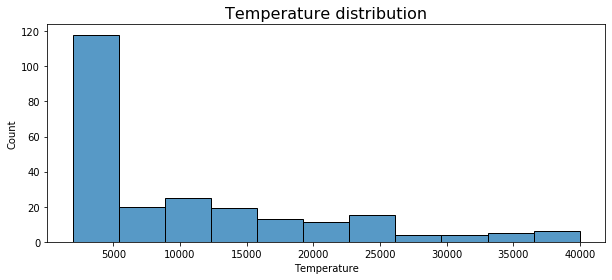

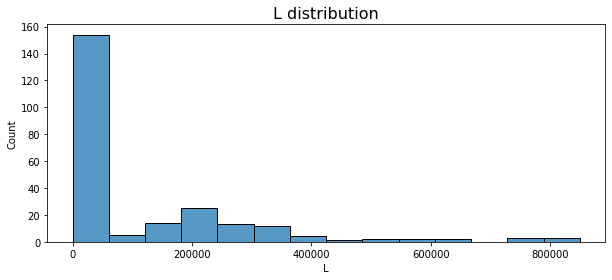

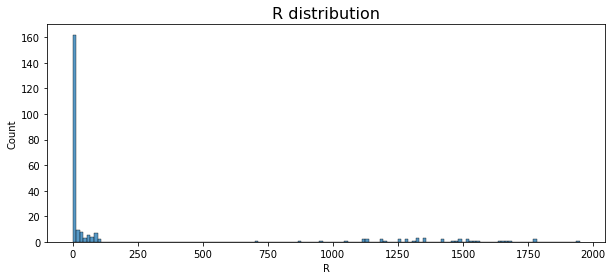

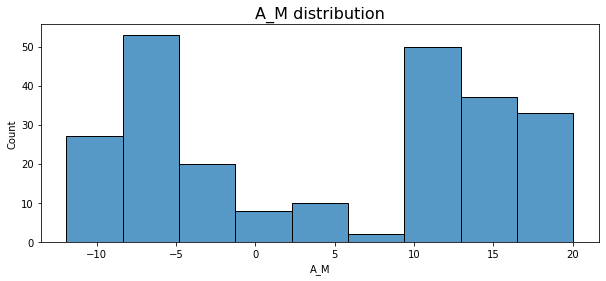

In [6]:
for col_name in df_numerical_vars:
    
    plt.figure(figsize=(10, 4))
    sns.histplot(x=col_name, data=df_numerical_vars)
    plt.title(col_name + " distribution", fontsize=16)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

In [7]:
corrPearson = df_numerical_vars.corr(method="pearson")
corrSpearman = df_numerical_vars.corr(method="spearman")

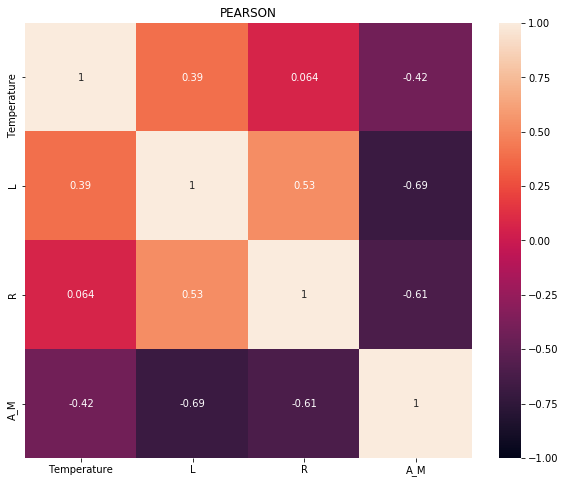

In [8]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True, vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.show()

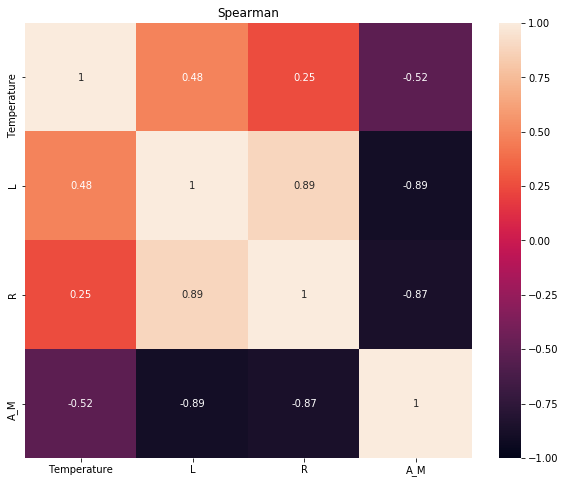

In [9]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True, vmin=-1, vmax=+1)
plt.title("Spearman")
plt.show()

# Categorical variables preprocessing and observations
## Color and spectral class

In [10]:
categorical_col=["Color","Spectral_Class"]
for elem in categorical_col:
    print(elem,":",len(df[elem].unique()))
    
df['Color'].value_counts()

Color : 17
Spectral_Class : 7


Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
yellowish               2
Whitish                 2
Orange                  2
Orange-Red              1
White-Yellow            1
Pale yellow orange      1
Blue-White              1
Yellowish               1
Name: Color, dtype: int64

In [11]:
# rename the colors
fixed_names = {
    'Red' : 'red', 
    'Blue' : 'blue', 
    'Blue-white' : 'blue-white', 
    'Blue White' : 'blue-white', 
    'yellow-white' : 'yellow-white', 
    'White' : 'white',
    'Blue white' : 'blue-white', 
    'white' : 'white', 
    'Yellowish White' : 'yellowish-white', 
    'yellowish' : 'yellow', 
    'Orange' : 'orange',
    'Whitish' : 'whitish', 
    'Yellowish' : 'yellowish', 
    'Blue-White' : 'blue-white', 
    'Pale yellow orange' : 'pale-yellow-orange',
    'Orange-Red' : 'orange-red', 
    'White-Yellow' : 'yellow-white' 
}

#change the names in the dataset
df['Color_name'] = df['Color'].map(fixed_names).astype('category')
df["Color_name"].value_counts()

red                   112
blue                   56
blue-white             41
white                  10
yellow-white            9
yellowish-white         3
yellow                  2
whitish                 2
orange                  2
yellowish               1
pale-yellow-orange      1
orange-red              1
Name: Color_name, dtype: int64

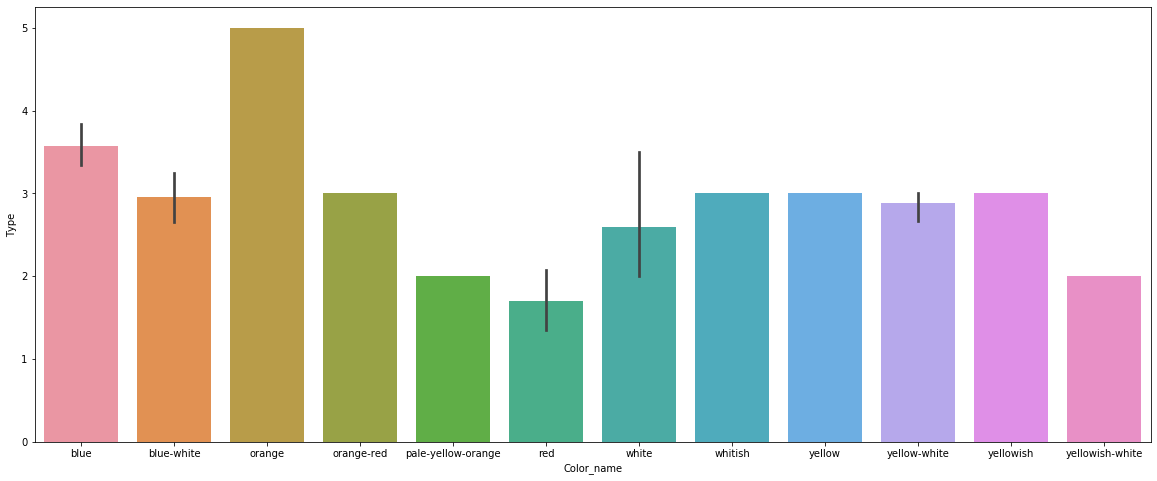

In [12]:
# Color distribution
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Color_name", y="Type", data=df)
plt.show()

In [13]:
color_id = {
    'red' : 0,
    'blue' : 1,
    'blue-white' : 2,
    'white' : 3,
    'yellow-white' : 4,
    'yellowish-white' : 5,
    'orange' : 6,
    'whitish' : 7,
    'yellow' : 8,
    'orange-red' : 9,
    'pale-yellow-orange' : 10,
    'yellowish' : 11,
}

df["Color_id"] = df["Color_name"].map(color_id)
df["Color_id"].unique()

# available 'Color_name' and 'Color_id', so columns 'Color' may be deleted
del df["Color"]

## Spectral classes

In [14]:
df["Spectral_Class"].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

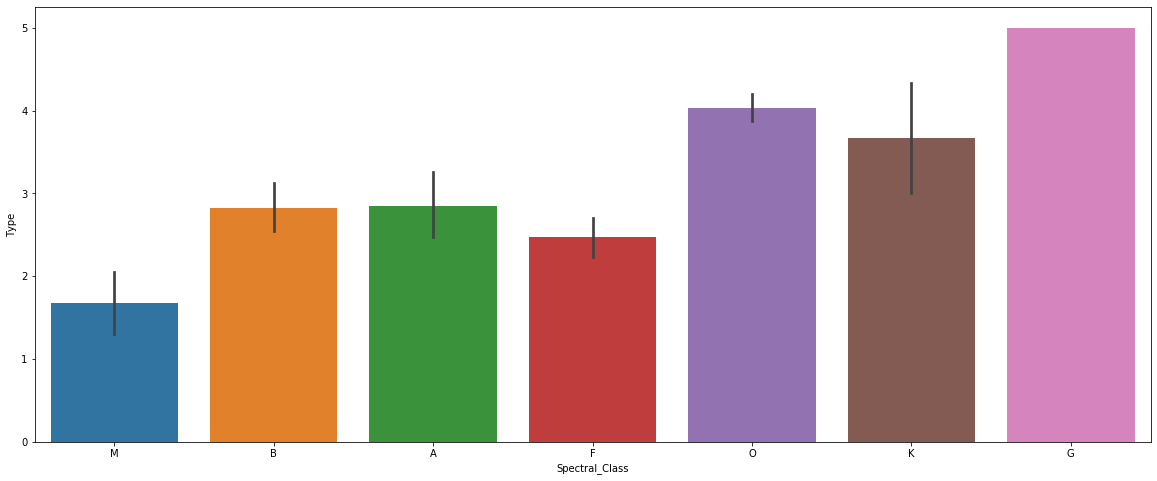

In [15]:
# spectral classes
figure = plt.figure(figsize=(20,8))
sns.barplot(x="Spectral_Class", y="Type", data=df)
plt.show()

In [16]:
df["Spectral_Class_name"] = df["Spectral_Class"]

spectral_class_id = {
    "M": 0,
    "B": 1,
    "A": 2,
    "F": 3,
    "O": 4,
    "K": 5,
    "G": 6
}

df["Spectral_Class_id"] = df["Spectral_Class_name"].map(spectral_class_id)
df["Spectral_Class_id"].unique()
del df["Spectral_Class"]

In [17]:
# show table after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Temperature          240 non-null    int64   
 1   L                    240 non-null    float64 
 2   R                    240 non-null    float64 
 3   A_M                  240 non-null    float64 
 4   Type                 240 non-null    int64   
 5   Color_name           240 non-null    category
 6   Color_id             240 non-null    category
 7   Spectral_Class_name  240 non-null    object  
 8   Spectral_Class_id    240 non-null    int64   
dtypes: category(2), float64(3), int64(3), object(1)
memory usage: 14.5+ KB


## Other plots/correlations

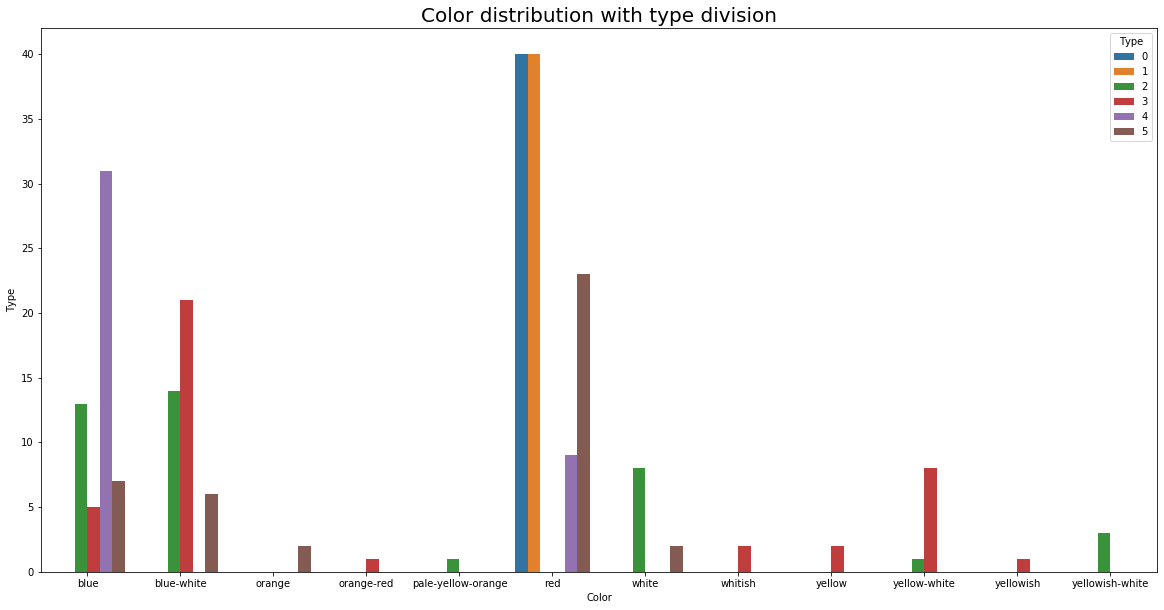

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Color_name", hue="Type", data=df)
plt.title("Color distribution with type division", fontsize=20)
plt.xlabel("Color")
plt.ylabel("Type")
plt.legend(loc="upper right", title="Type")
plt.show()

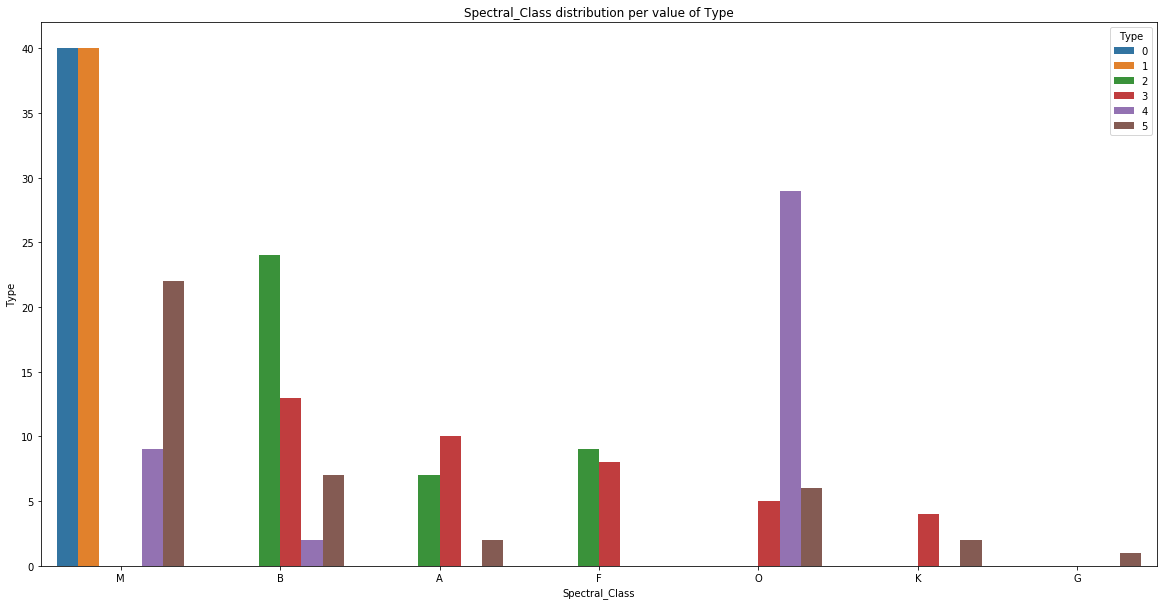

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Spectral_Class_name", hue="Type", data=df)
plt.title("Spectral_Class distribution per value of Type")
plt.xlabel("Spectral_Class")
plt.ylabel("Type")
plt.legend(loc="upper right", title="Type")
plt.show()

## One-hot encoding

In [20]:
df=pd.get_dummies(data=df,columns=["Color_name","Spectral_Class_name"])
print(df.head())

   Temperature         L       R    A_M  Type Color_id  Spectral_Class_id  \
0         3068  0.002400  0.1700  16.12     0        0                  0   
1         3042  0.000500  0.1542  16.60     0        0                  0   
2         2600  0.000300  0.1020  18.70     0        0                  0   
3         2800  0.000200  0.1600  16.65     0        0                  0   
4         1939  0.000138  0.1030  20.06     0        0                  0   

   Color_name_blue  Color_name_blue-white  Color_name_orange  ...  \
0                0                      0                  0  ...   
1                0                      0                  0  ...   
2                0                      0                  0  ...   
3                0                      0                  0  ...   
4                0                      0                  0  ...   

   Color_name_yellow-white  Color_name_yellowish  Color_name_yellowish-white  \
0                        0                

## Splitting the datasets (training and testing)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
x=df.drop("Type",axis=1)
y=df["Type"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print(x_train.shape)
print(x_test.shape)

(192, 25)
(48, 25)


In [26]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## LazyPredict

In [27]:
from lazypredict.Supervised import LazyClassifier
lazyclassifier = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazyclassifier.fit(x_train, x_test, y_train, y_test)
print(models)

/home/szymon/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:01<00:00, 26.20it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
Perceptron                         1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LabelPropagation                   0.98               0.98    None      0.98   
LabelSpreading                     0.98               0.98    None      0.98   
PassiveAggressiveClassifier        0.98 

In [28]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import make_pipeline
# clf = svm.SVC(C = 100000000, gamma=0.00000000001) # can use another kernel like linear
# y_pred = clf.predict(x_test)

In [175]:
def performSVM(kernel, c = 1):
    clf = svm.SVC(kernel = kernel, C = c,decision_function_shape='ovo')
    clf.fit(x_train_scaled, y_train)
    y_pred = clf.predict(x_test_scaled)
    return y_pred
performSVM("linear", c = 3)
metrics.accuracy_score(y_test, y_pred)

1.0

In [176]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



Maby try to perform lineardiscriminantanalysis

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(x_train_scaled,y_train)
y_pred = clf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred))

1.0


SGDClassifier

In [277]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha =1e-8, random_state = 0) # it is enough to slightly decrease alpha
clf.fit(x_train_scaled, y_train)

SGDClassifier(alpha=1e-08, random_state=0)

In [276]:
y_pred= clf.predict(x_test_scaled)
metrics.accuracy_score(y_test, y_pred)

1.0